In [121]:
import requests
import json
import re
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import pandas as pd
import urllib.request 
%matplotlib inline
from datetime import datetime, date

In [5]:
def vk_api(method, **kwargs):
    api_request = 'https://api.vk.com/method/'+method + '?'
    api_request += '&'.join(['{}={}'.format(key, kwargs[key]) for key in kwargs])
    return json.loads(requests.get(api_request).text)

In [132]:
data = vk_api('wall.get', domain='meduzaproject')

In [7]:
group_info = vk_api('groups.getById', group_id='meduzaproject', v='5.63')
group_id = group_info['response'][0]['id']
group_id

76982440

In [81]:
posts = []
item_count = 200

result = vk_api('wall.get', owner_id=-group_id, v='5.63', count=100)
posts += result["response"]["items"]

while len(posts) < item_count:
    result = vk_api('wall.get', owner_id=-group_id, v='5.63', count=100, offset=len(posts))
    posts += result['response']["items"]
len(posts)


200

In [98]:
def get_comments(p_id):
    comments = []
    item_count = 200
    k = 101
    l = 102
    
    result = vk_api('wall.getComments', post_id=p_id, owner_id=-group_id, v='5.63', count=200)
    comments += result["response"]["items"]
   
    while len(comments) < item_count and k != l:
        k = len(comments)
        result = vk_api('wall.getComments', post_id=p_id, owner_id=-group_id, v='5.63', count=200, offset=len(comments))
        comments += result['response']["items"]
        l = len(comments)
        
    print(len(comments))
    return comments

In [83]:
def get_age(bdate):
    
    today = datetime.today()  
    bdate = datetime.strptime(bdate, '%d.%m.%Y').date()
    
    age = today.year - bdate.year
    if today.month < bdate.month:
        age -= 1
    elif today.month == bdate.month and today.day < bdate.day:
        age -= 1
    return age

In [105]:
len_data = {}
city_info = {}
bdate_info = {}

i = 0
for post in posts:
    if not len(post['text']) in len_data:
        len_data[len(post['text'])] = []
        
    comments = get_comments(post['id'])
    
    for com in comments:
        l = len(com["text"])
        len_data[len(post['text'])].append(l)
        
        user_id = com["from_id"]            
        user_city = vk_api('users.get', user_ids=user_id, fields='city', v='5.63')
        user_bdate = vk_api('users.get', user_ids=user_id, fields='bdate', v='5.63')

        if 'city' in user_city['response'][0]:
            city = user_city['response'][0]["city"]["title"] 
            
            if city in city_info:
                city_info[city].append(l)
            else:
                city_info[city] = [l]
                
        if 'bdate' in user_bdate["response"][0]:
            bdate = user_bdate["response"][0]['bdate'] 
            
            if '1901' in bdate:
                print('off')
            else:
                match = re.search('[1-90]+\.[1-90]+\.[1-90]+', bdate)
            
            if match:
                age = get_age(bdate)
                if age in bdate_info:
                    bdate_info[age].append(l)
                else:
                    bdate_info[age] = [l]
                match = None
    i += 1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [108]:
for el in len_data:    
    len_data[el] = sum(len_data[el])/len(len_data[el])
    
for d in bdate_info:
    bdate_info[d] = sum(bdate_info[d])/len(bdate_info[d])

for c in city_info:
    city_info[c] = sum(city_info[c])/len(city_info[c])
city_info

{'Abéché': 28.0,
 'Addis Ababa': 79.66666666666667,
 'Akureyri': 9.5,
 'Amsterdam': 84.66666666666667,
 'Avarua': 20.0,
 'Bago': 13.0,
 'Bangar': 153.33333333333334,
 'Barcelona': 16.0,
 'Basel': 75.0,
 'Basseterre': 53.375,
 'Beograd': 49.90909090909091,
 'Berlin': 49.0,
 'Bogotá': 44.4,
 'Boston': 71.0,
 'Bournemouth': 67.0,
 'Bratislava': 144.0,
 'Breda': 64.5,
 'Bridgetown': 36.0,
 'Brighton': 16.0,
 'Brisbane': 30.0,
 'Brno': 208.0,
 'Bruxelles': 35.0,
 'Budapest': 29.0,
 'Bydgoszcz': 1.0,
 'Bühl': 99.0,
 'Bătdâmbâng': 23.0,
 'Calabar': 51.0,
 'Canberra': 50.0,
 'Chaguanas': 983.5,
 'Charleroi': 88.0,
 'Chicago': 52.5,
 'Chitungwiza': 33.0,
 'Cleveland': 43.0,
 'Conakry': 48.666666666666664,
 'Copenhagen': 65.0,
 'Cottbus': 16.0,
 'Dallas': 0.0,
 'Darmstadt': 71.0,
 'Delray Beach': 27.0,
 'Detroit': 58.857142857142854,
 'Dirē Dawa': 30.0,
 'Dortmund': 1059.5,
 'Dubai': 220.51282051282053,
 'Düsseldorf': 36.2,
 'El Aaiún': 21.5,
 'Espoo': 53.5,
 'Essen': 39.0,
 'Faro Capo Vaticano'

### График зависимости средней длины комментария от длины поста

В текстах всех постов есть ссылка на полный материал статьи. Поскольку ее длина примерно одинаковая во всех постах, я решила не удалять ее при подсчете длины поста. Удаление ссылки просто сдвинуло бы график зависимости длины комментариев от лдины поста слегка вниз.

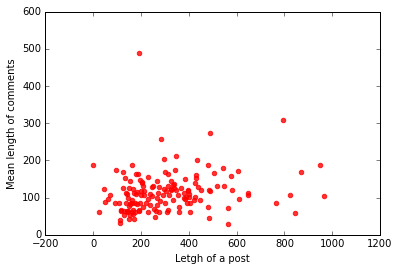

In [95]:
plt.scatter([i for i in len_data], [len_data[i] for i in len_data], color = 'r', alpha = 0.8)
plt.ylabel('Mean length of comments')
plt.xlabel('Letgh of a post')

### График зависимости средней длины комментария от возраста

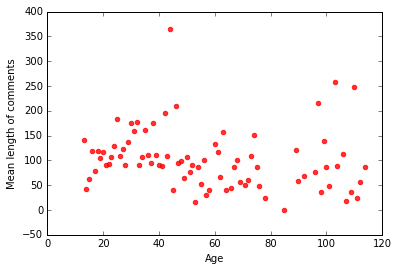

In [96]:
plt.scatter([i for i in bdate_info], [bdate_info[i] for i in bdate_info], color = 'r', alpha = 0.8)
plt.ylabel('Mean length of comments')
plt.xlabel('Age')

In [113]:
cities = []
for c in city_info:
    cities.append((c, city_info[c]))
cities

[('Tampere', 63.0),
 ('Симферополь', 102.27272727272727),
 ('Гродно', 159.2),
 ('Великий Новгород', 29.0),
 ('Архангельск', 112.6590909090909),
 ('Монино', 87.0909090909091),
 ('Колпино', 23.0),
 ('Северодвинск', 57.5),
 ('Ростов-на-Дону', 126.9186046511628),
 ('Leipzig', 34.4),
 ('Dallas', 0.0),
 ('Рузаевка', 75.33333333333333),
 ('Сызрань', 40.666666666666664),
 ('Уфа', 124.0126582278481),
 ('Ярославль', 75.96774193548387),
 ('Магнитогорск', 169.73333333333332),
 ('Волжский', 82.0),
 ('Чайковский', 128.33333333333334),
 ('Winterfeld', 67.0),
 ('Боярка', 57.0),
 ('Железнодорожный (Балашиха)', 27.5),
 ('Чита', 170.0),
 ('Петропавловск-Камчатский', 20.0),
 ('Орехово-Зуево', 107.0),
 ('Беэр Шева', 47.75),
 ('Тбилиси', 35.333333333333336),
 ('Долгопрудный', 57.0),
 ('Кемерово', 72.38461538461539),
 ('Кыштым', 0.0),
 ('Philadelphia', 85.75),
 ('Коломна', 99.16666666666667),
 ('Addis Ababa', 79.66666666666667),
 ('Memphis', 98.46666666666667),
 ('Ухта', 99.42857142857143),
 ('Фрязино', 0.0)

### Меняем настройки для отображения кириллицы

In [124]:
from matplotlib import rc
matplotlib.rcdefaults() # сброс настроек  
 
font = {'family': 'Courier New',
        'weight': 'normal'}
rc('font', **font)

### Рисуем графики средней длины комментария для городов (на один все не влезло)

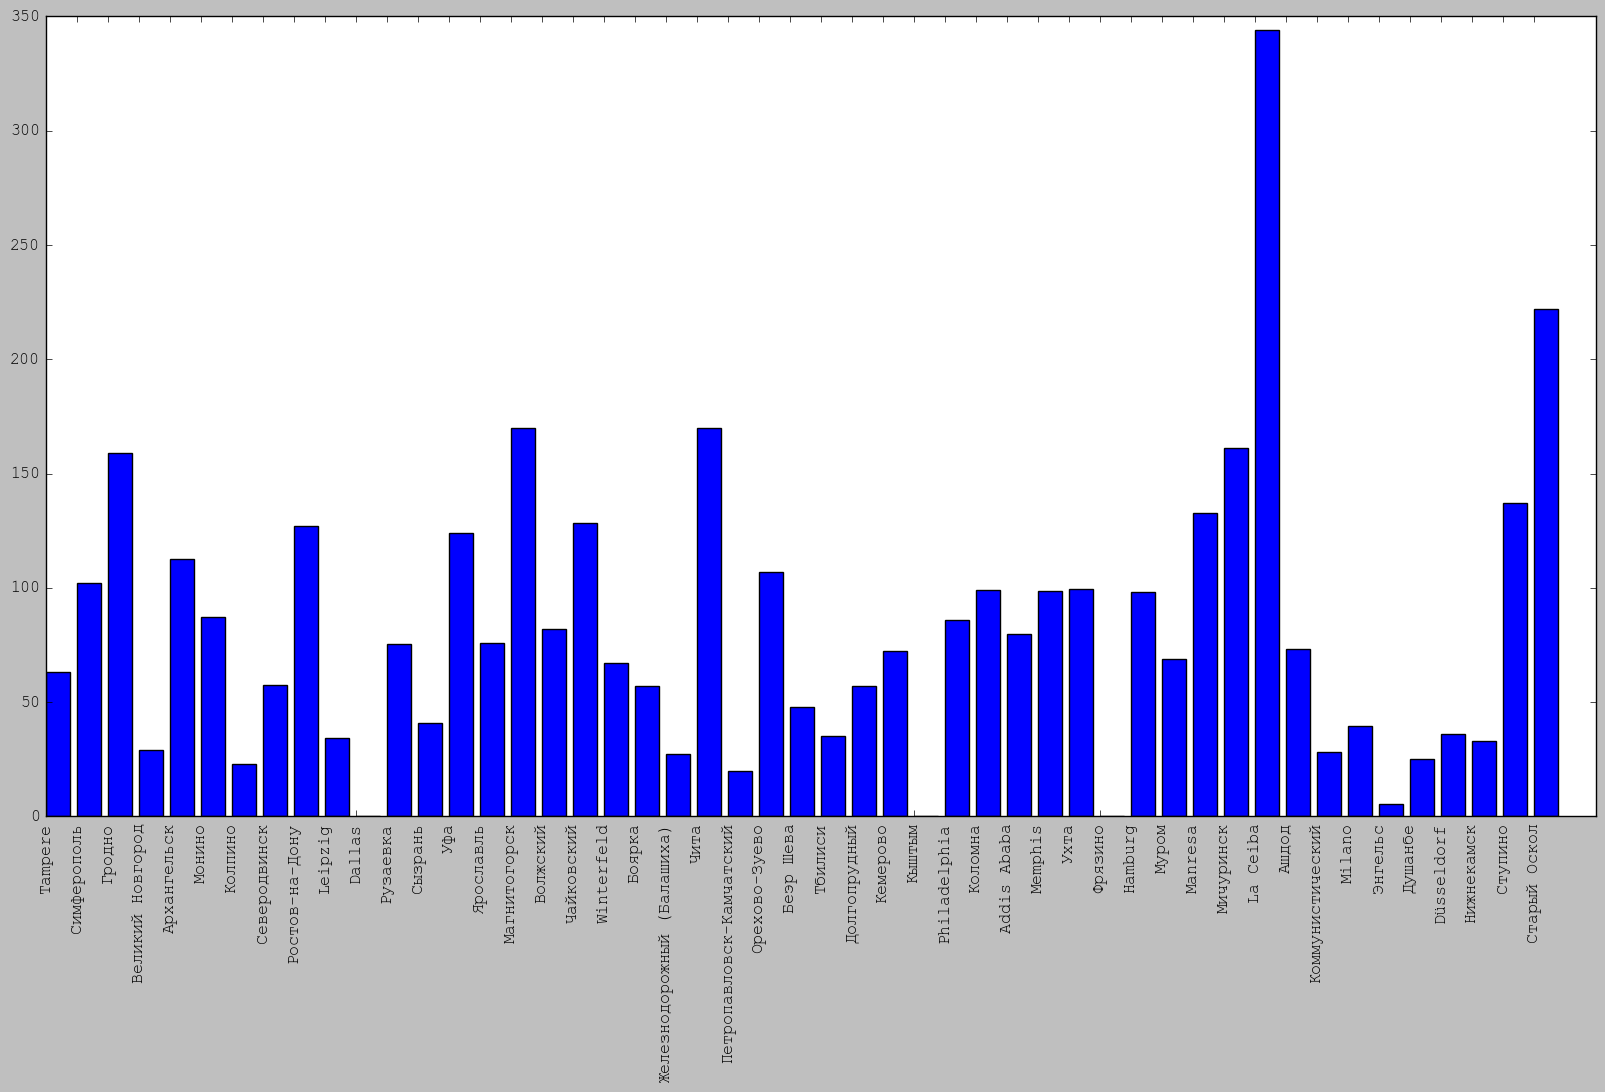

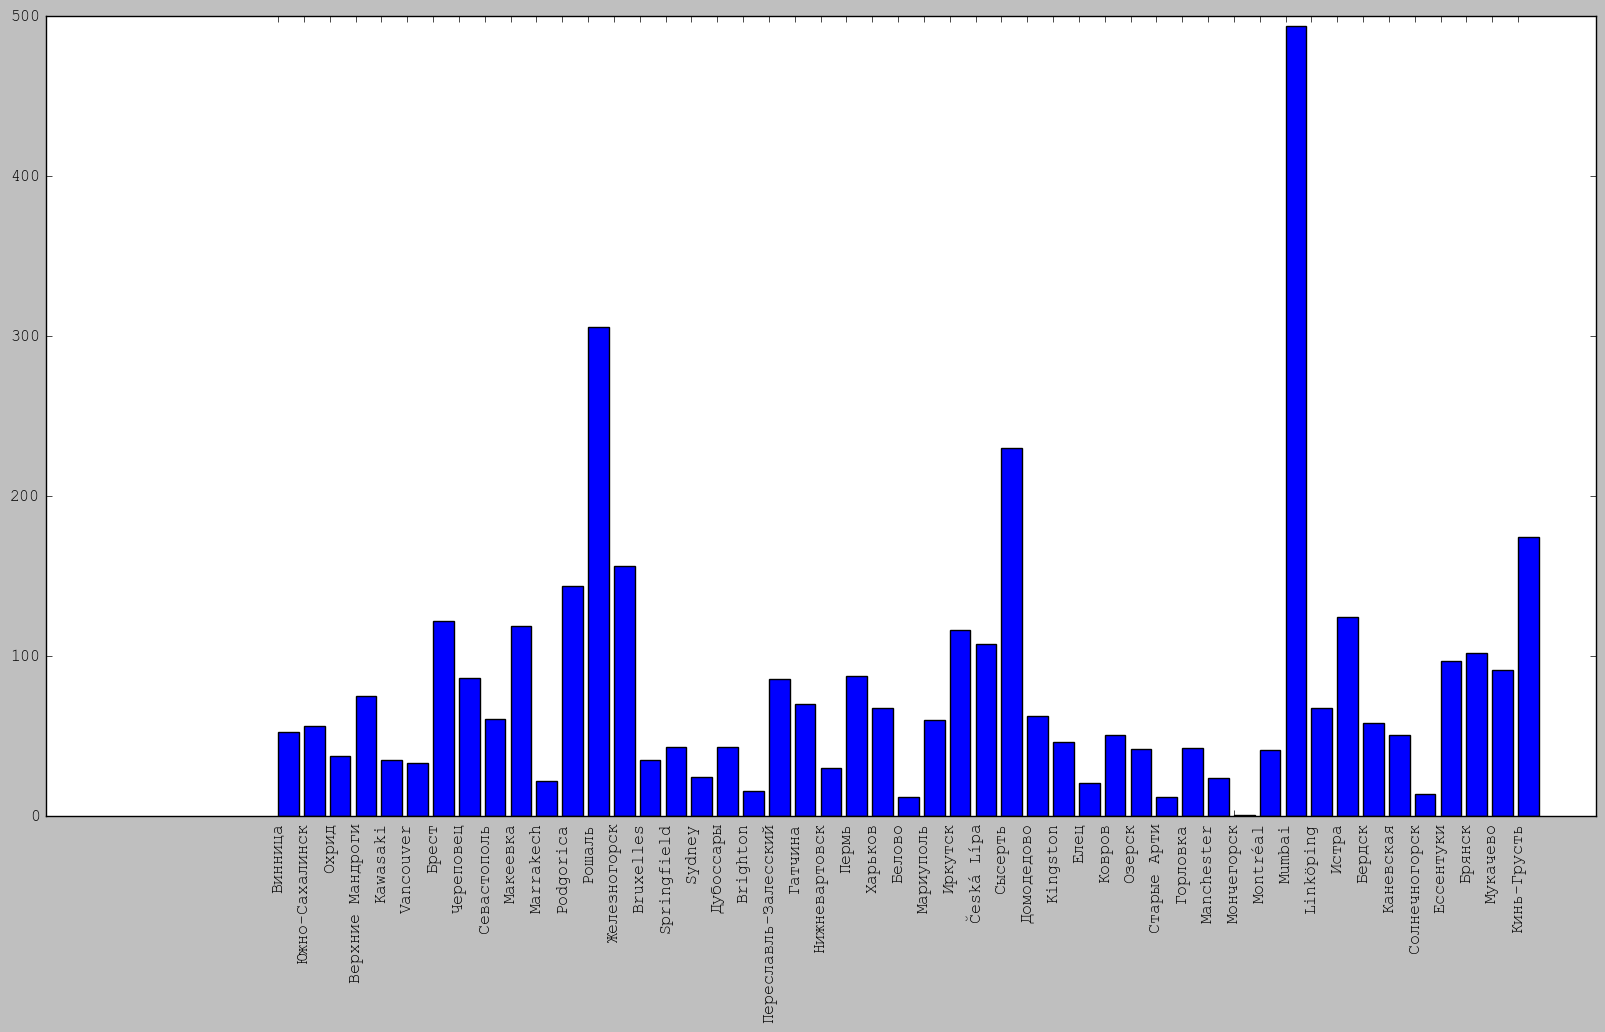

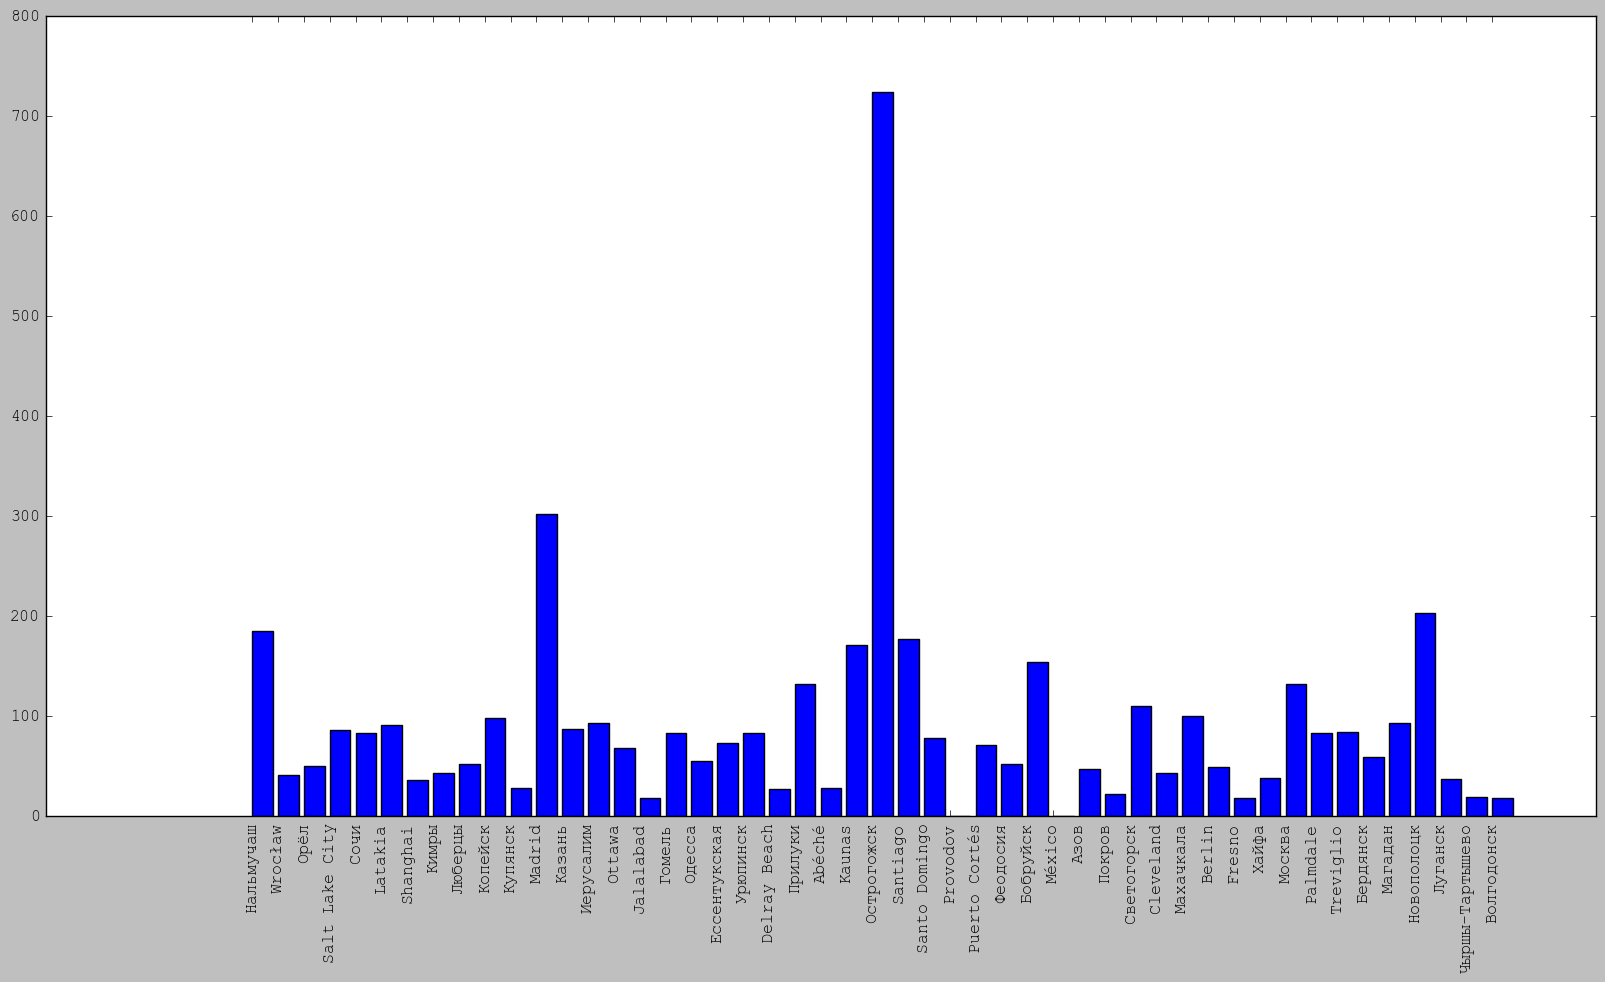

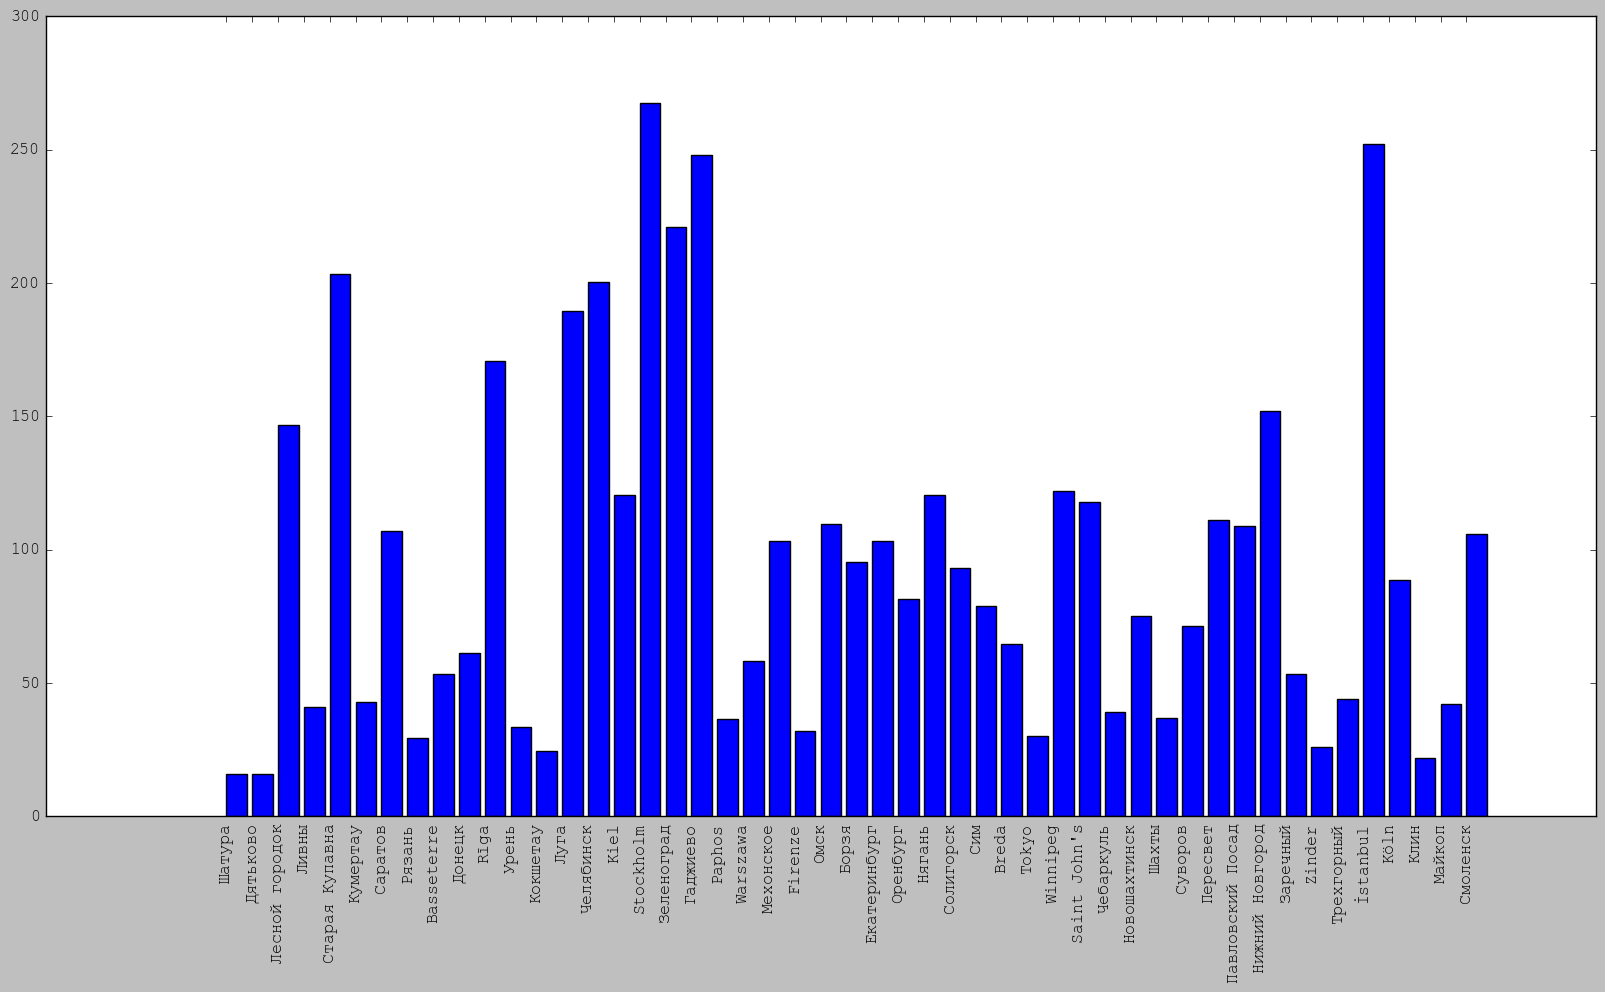

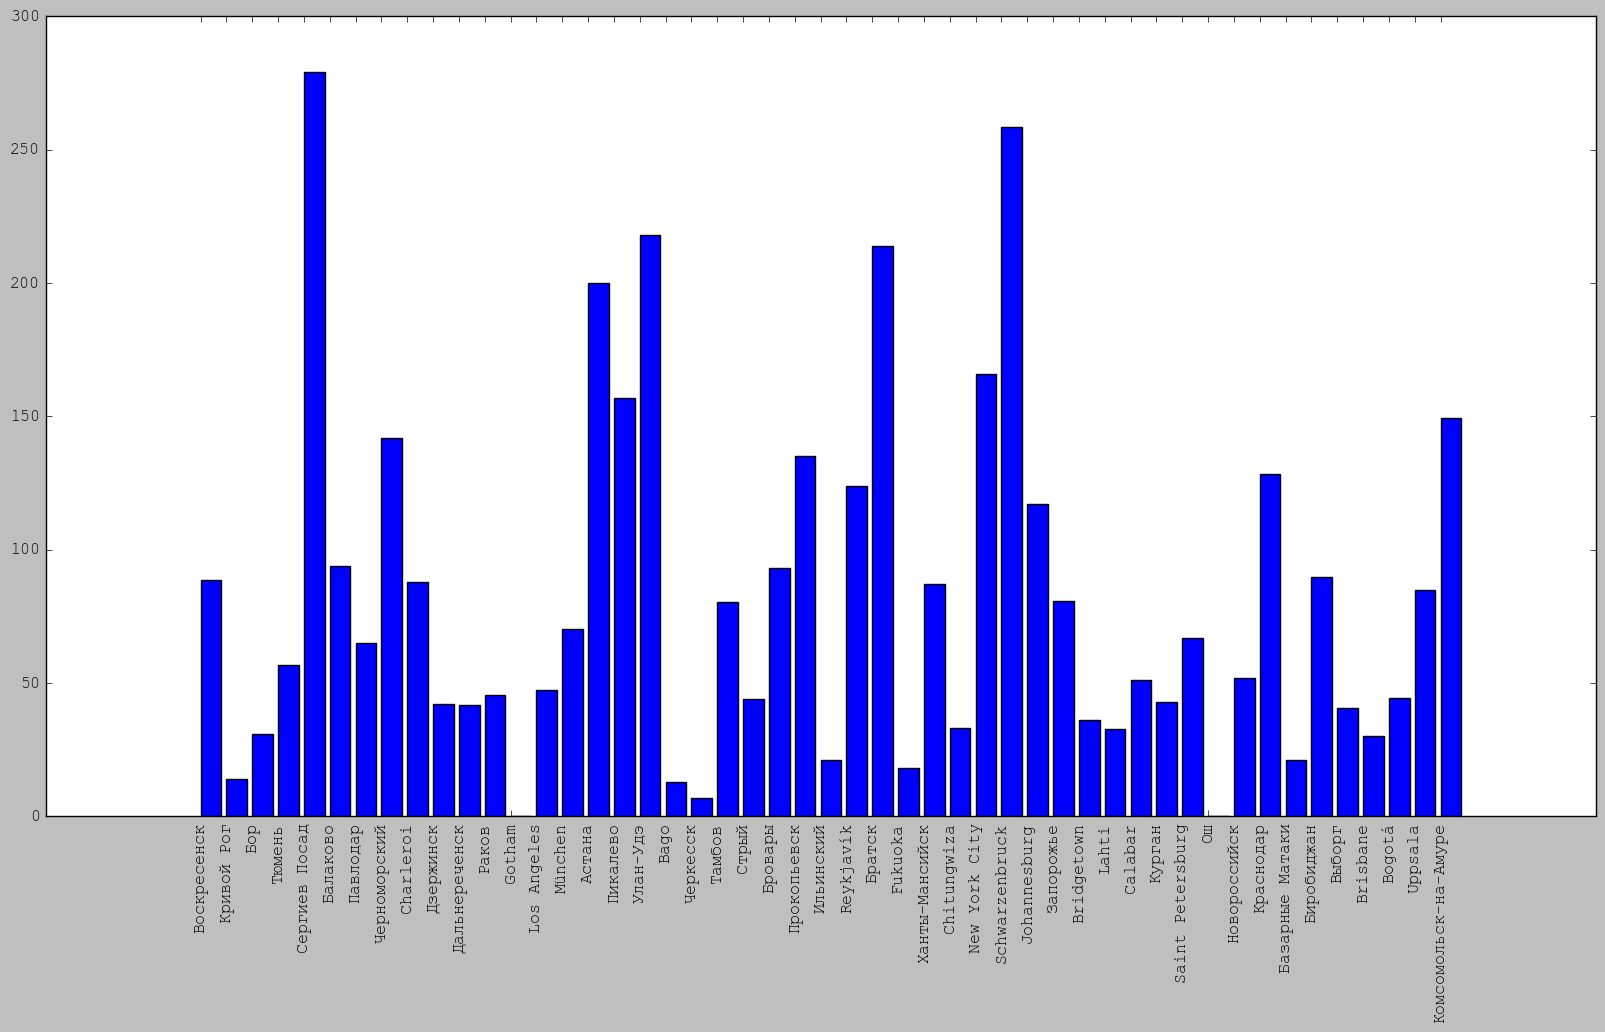

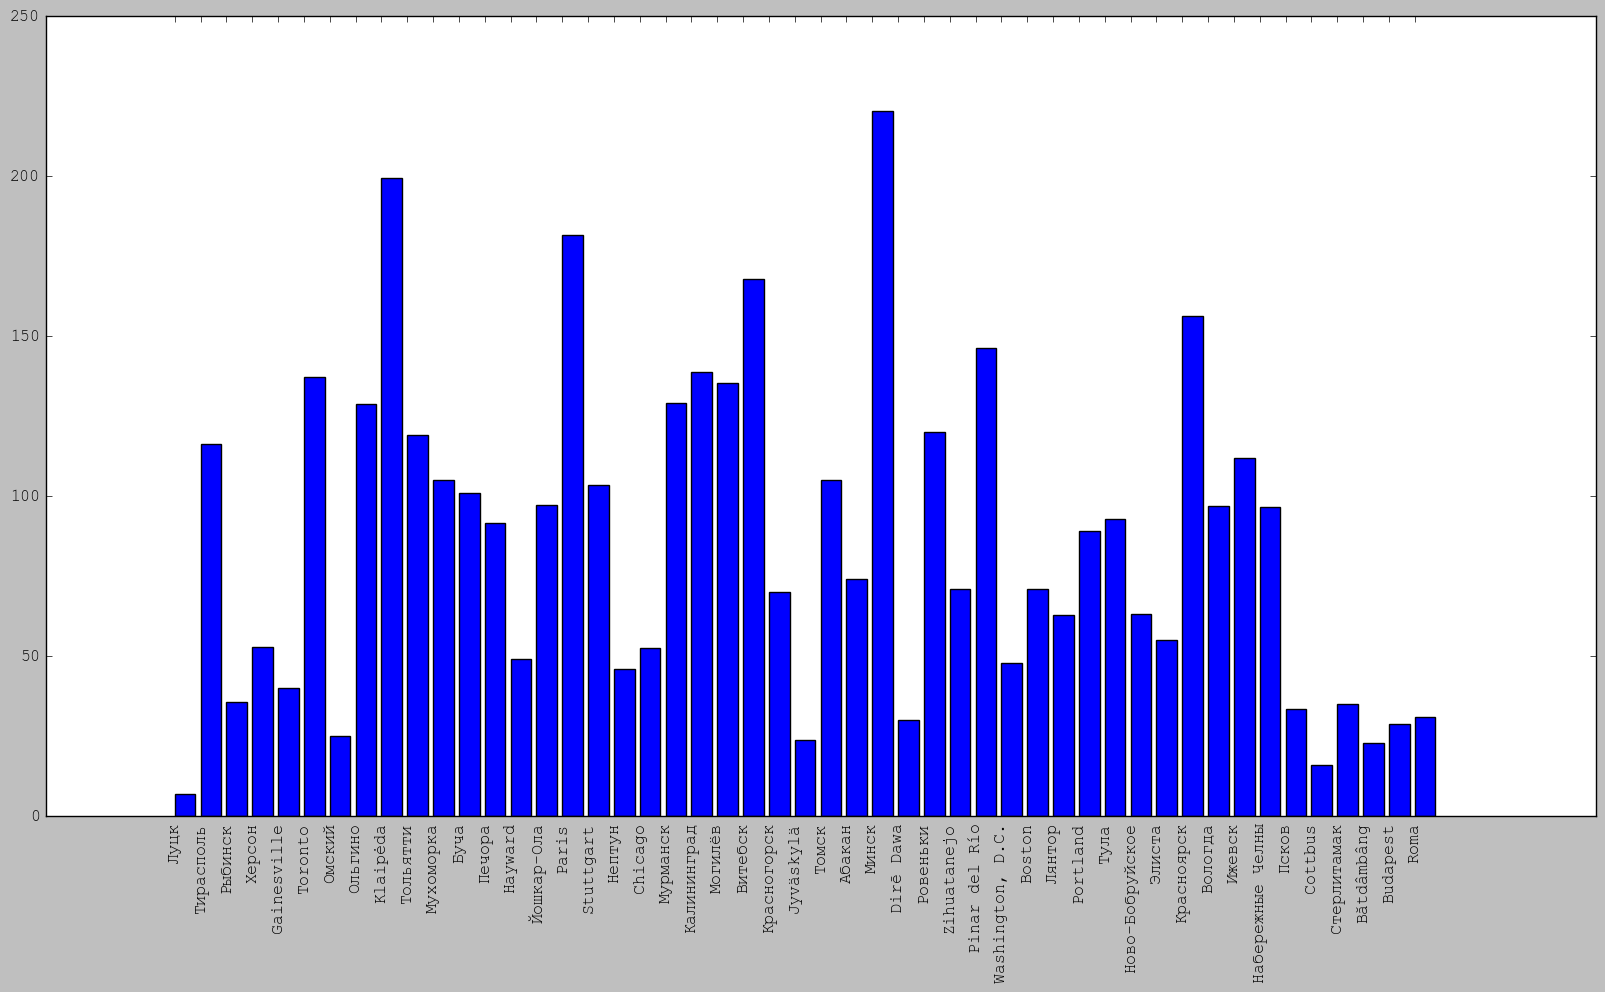

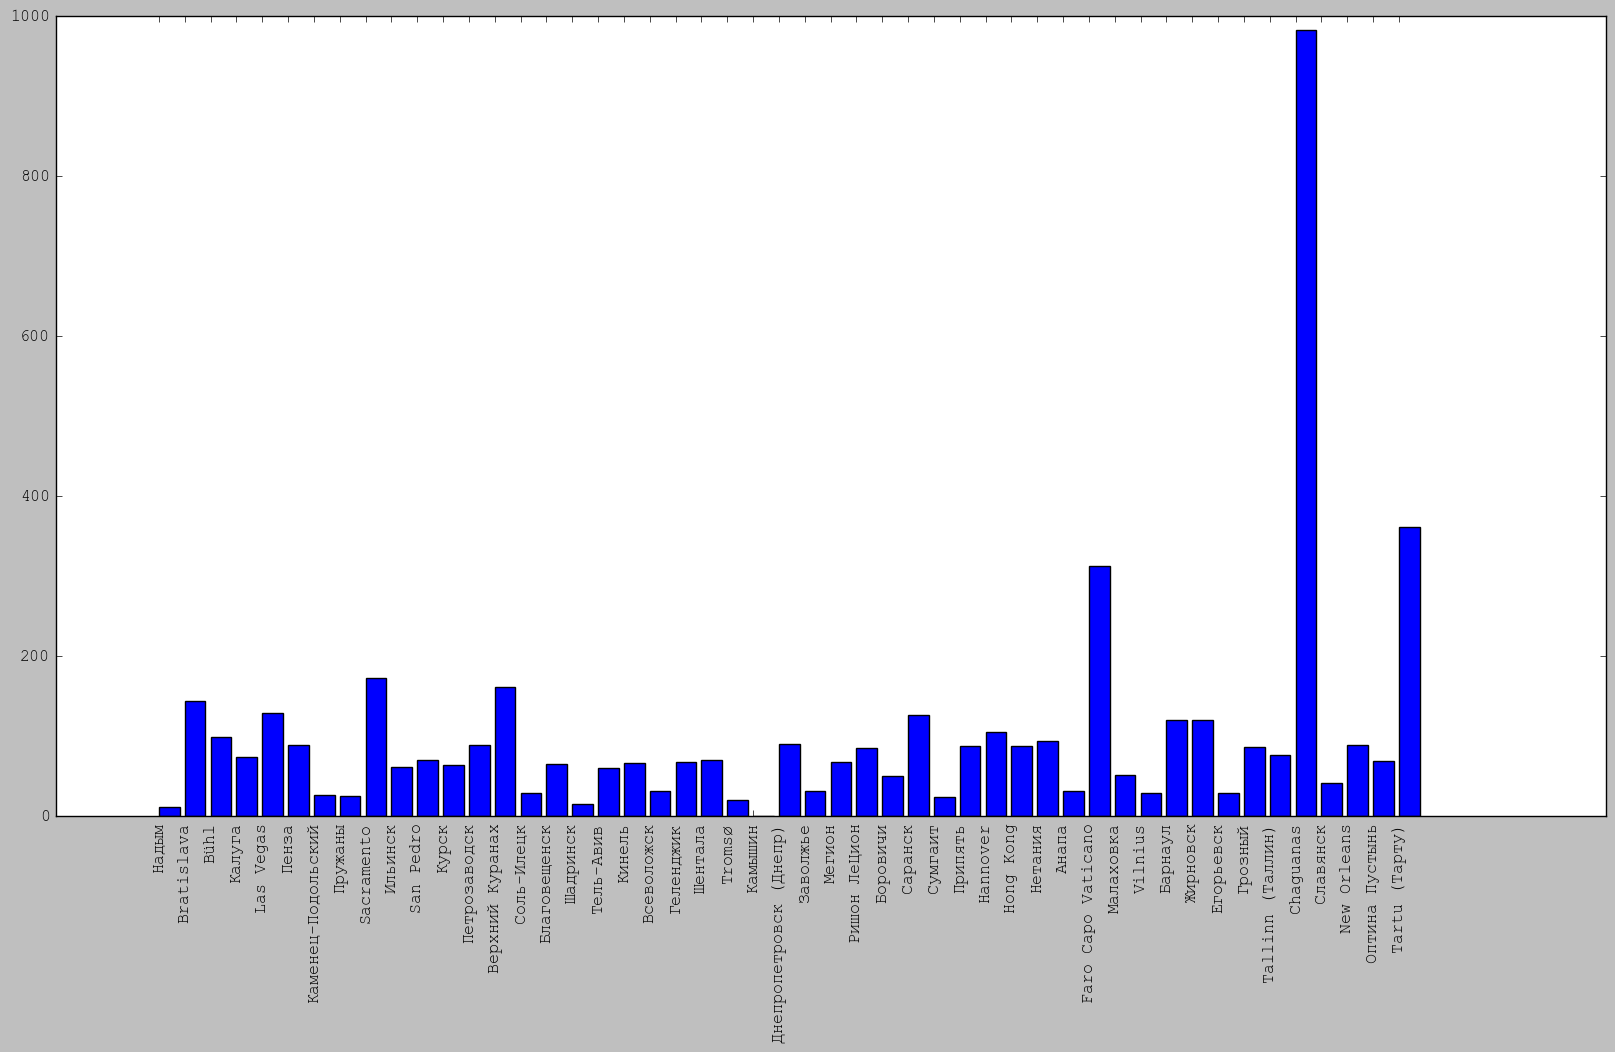

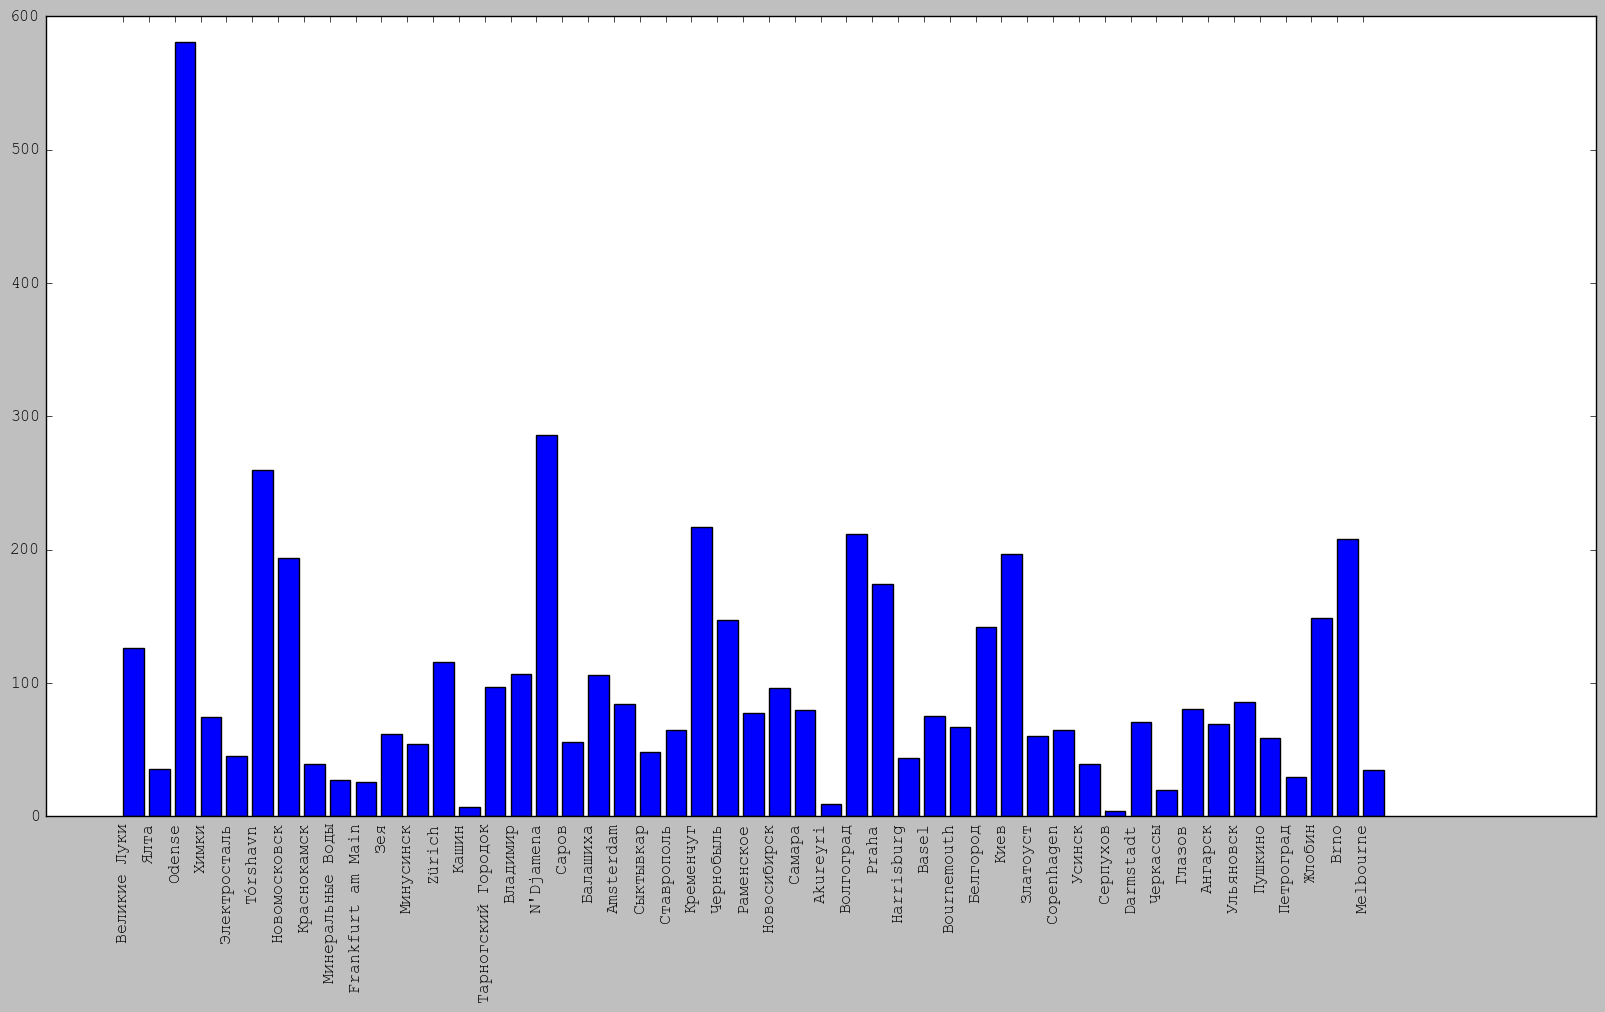

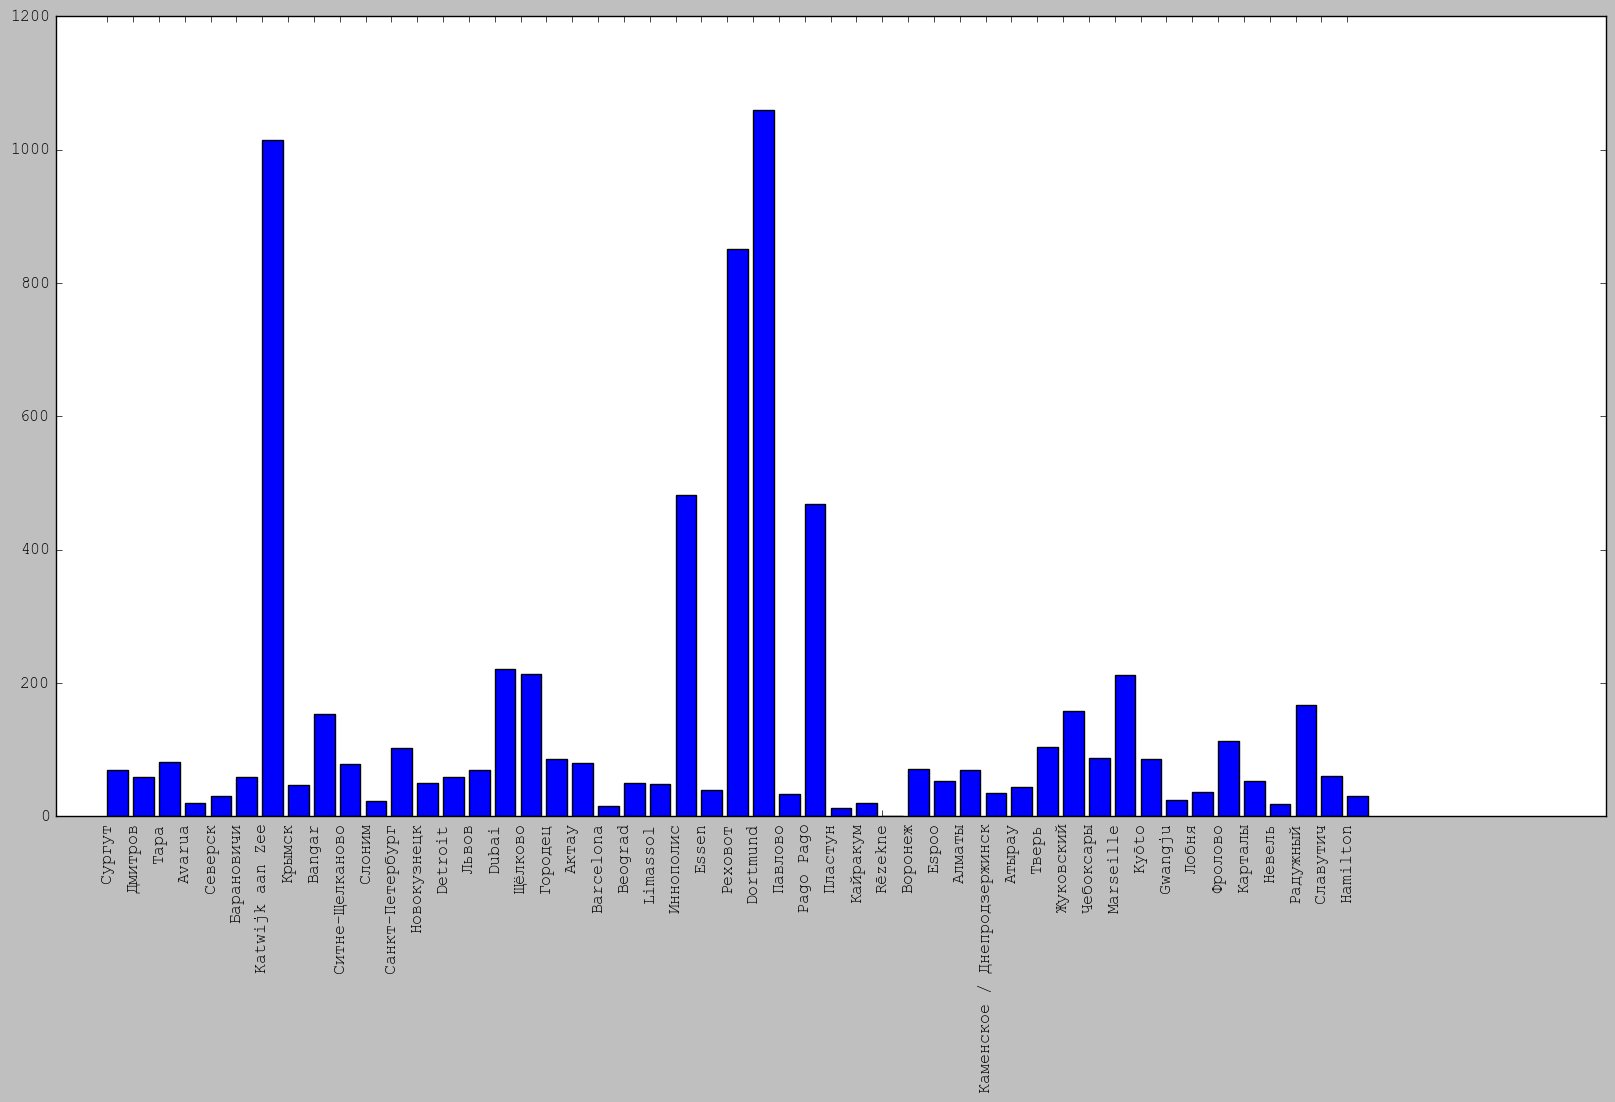

In [125]:

for k in range (49, len(cities), 49):

    plt.figure(figsize=(20,10))
    plt.bar(range(k-49, k), [cities[i][1] for i in range (k-49, k)])
    plt.xticks(range(k-49, k), [cities[i][0] for i in range (k-49, k)], rotation='vertical')
    plt.show()

### Выкачиваем тексты постов

In [131]:
f = open(r'C:\Users\Masha\Documents\Programming\post_texts.txt', 'w', encoding = 'utf-8')
for post in posts:
    f.write(post['text'] + '\n')
f.close()